In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Estimación no paramétrica

Bajamos los datos de GitGub

In [12]:
! wget https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/CEIA_ProbayEstadistica/master/Islander_data.csv

--2022-08-02 18:01:20--  https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/CEIA_ProbayEstadistica/master/Islander_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7415 (7.2K) [text/plain]
Saving to: ‘Islander_data.csv’

Islander_data.csv   100%[===================>]   7.24K  --.-KB/s    in 0s      

2022-08-02 18:01:20 (84.6 MB/s) - ‘Islander_data.csv’ saved [7415/7415]



Cargamos el csv usando Pandas

In [13]:
datos  = pd.read_csv('Islander_data.csv')
datos.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


Retenemos la columna de interés (Diff)

In [ ]:
x = datos.Diff

Graficamos la func. de distribución empírica

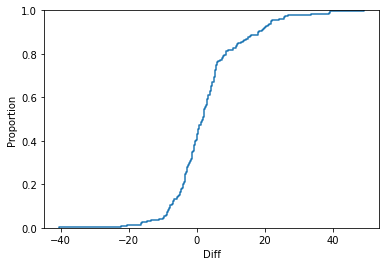

In [ ]:
sns.ecdfplot(x)

Graficamos el histograma usando matplotlib

(array([  1.,  33., 135.,  25.,   4.]),
 array([-40.4 , -22.52,  -4.64,  13.24,  31.12,  49.  ]),
 <a list of 5 Patch objects>)

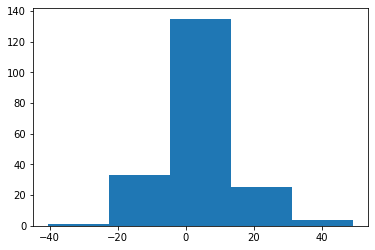

In [ ]:
plt.hist(x, bins=5)

Repetimos usando Seaborn (mucho mas lindo!)

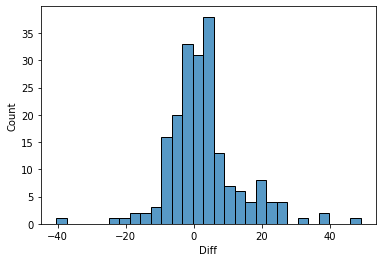

In [ ]:
sns.histplot(x)

Graficamos la estimación de densidad por Kernel

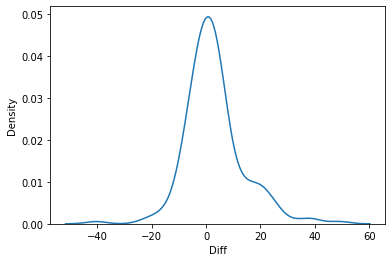

In [ ]:
sns.kdeplot(x)

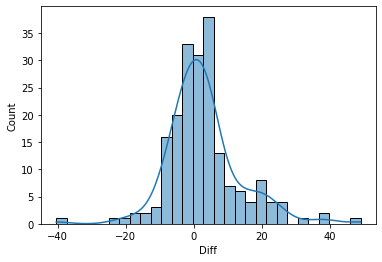

In [ ]:
sns.histplot(x, kde=True)

#Intervalos de confianza
$X\sim \mathcal{N}(\mu, 4)$

Generamos las muestras

In [ ]:
n=100
x = np.random.normal(loc=3, scale=2, size=n)

Calculamos el cuantil necesario para calcular el IC

In [ ]:
q = stats.norm.ppf(0.995)
q

2.5758293035489004

Calculmos los límites del intervalo para la observación

In [ ]:
a = x.mean() - q*2/np.sqrt(n)
b= x.mean() + q*2/np.sqrt(n)

In [ ]:
print('media: ', x.mean())
print('a :',a,', b: ',b)

media:  2.6713193336286
a : 2.15615347291882 , b:  3.18648519433838


Computamos la longitud del intervalo

In [ ]:
b-a

1.03033172141956

$X\sim \mathcal{N}(\mu, \sigma^2)$ ambos desconocidos.
Busco IC para $\mu$

In [ ]:
t = stats.t.ppf(0.995,df=n-1)
t

2.6264054563851857

In [ ]:
at = x.mean() - t*x.std()/np.sqrt(n)
bt = x.mean() + t*x.std()/np.sqrt(n)

In [ ]:
print('media: ', x.mean(),  'desvio: ',x.std())
print('a :',at,', b: ',bt)

media:  2.6713193336286 desvio:  1.6422262380245285
a : 2.2400041384119462 , b:  3.1026345288452535


In [ ]:
bt-at

0.8626303904333072